# Esercizio 1

In un processo chiamato mitosi, il tempo che impiega una cellula a dividersi segue una distribuzione normale di media 60 minuti e deviazione standard di 5 minuti.

1. Qual è la probabilità che una cellula si divida in meno di 45 minuti?
2. Qual è la probabilità che una cellula si divida in più di 65 minuti?
3. Qual è il tempo impiegato approssimativamente dal 99% delle cellule per completare la mitosi?
4. Su un campione di 20 cellule, qual è la probabilità che il tempo medio di divisione sia minore di 58 minuti?


In [22]:
import numpy as np
from scipy.stats import norm

media = 60
dev_std = 5

# Quesito 1

punto1 = norm.cdf(45, media, dev_std)
print("Probabiità che una cellula si divida in meno di 45 minuti: ", punto1)

# Quesito 2

punto2 = 1 - norm.cdf(65, media, dev_std)
print("Probabiità che una cellula si divida in più di 65 minuti: ", punto2)

# Quesito 3

punto3 = norm.ppf(0.99, media, dev_std)
print("Tempo impiegato dal 99% delle cellule per compleatre la mitosi: ", punto3)

# Quesito 4

media = 20 * media
dev_std = np.sqrt(20) * dev_std

punto4 = norm.cdf(58, media, dev_std)
print("Probabiità che 20 cellule si dividano in meno di 58 minuti: ", punto4)

Probabiità che una cellula si divida in meno di 45 minuti:  0.001349898031630093
Probabiità che una cellula si divida in più di 65 minuti:  0.15865525393145707
Tempo impiegato dal 99% delle cellule per compleatre la mitosi:  71.6317393702042
Probabiità che 20 cellule si dividano in meno di 58 minuti:  0.0


# Esercizio 2

Il costo unitario (y) di un certo prodotto varia in funzione del numero (x) di pezzi richiesti. I dati sono riportati nella seguente tabella:

| x   | 20   | 25   | 30   | 35   | 40   | 50   | 60   | 65   | 70   | 75   | 80   | 90   |
| --- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| y   | 1.81 | 1.70 | 1.65 | 1.55 | 1.48 | 1.40 | 1.30 | 1.26 | 1.24 | 1.21 | 1.20 | 1.18 |

1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si giustifichi mediante il coefficiente di determinazione se il modello è adeguato oppure no.
2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
3. Si determinino i coefficienti per un modello di regressione lineare del tipo y = a0 + a1x + a2x^2 e si calcoli nuovamente il coefficiente di determinazione.
4. Si determinino gli intervalli di confidenza al 95% per i nuovi coefficienti.


In [23]:
import numpy as np
from scipy.stats import t

x = np.array([20, 25, 30, 35, 40, 50, 60, 65, 70, 75, 80, 90])
y = np.array([1.81, 1.70, 1.65, 1.55, 1.48, 1.40, 1.30, 1.26, 1.24, 1.21, 1.20, 1.18])
n = x.size

# Quesito 1

x_bar = np.mean(x)
y_bar = np.mean(y)

sig_bar_xy = np.sum((x - x_bar) * (y - y_bar)) / n
sig2_bar_x = np.sum((x - x_bar) ** 2) / n
sig2_bar_y = np.sum((y - y_bar) ** 2) / n

b0 = y_bar - (sig_bar_xy / sig2_bar_x) * x_bar
b1 = sig_bar_xy / sig2_bar_x

print("Coefficienti della retta di regressione: ")
print(b0, b1)

y_hat = b0 + b1 * x
r = y - y_hat
s2 = np.sum(r**2) / (n - 2)

alpha = 0.05
s = np.sqrt(s2)
T = t.ppf(1 - alpha / 2, n - 2)

b0_left = b0 - s * np.sqrt(1 / n + x_bar**2 / (n * sig2_bar_x)) * T
b0_right = b0 + s * np.sqrt(1 / n + x_bar**2 / (n * sig2_bar_x)) * T

b1_left = b1 - (s / np.sqrt(sig2_bar_x * n)) * T
b1_right = b1 + (s / np.sqrt(sig2_bar_x * n)) * T

print("Intervalli di confidenza per b0: [{}, {}]".format(b0_left, b0_right))
print("Intervalli di confidenza per b1: [{}, {}]".format(b1_left, b1_right))

R2 = sig_bar_xy**2 / (sig2_bar_x * sig2_bar_y)

print("Coefficiente di determinazione: ", R2)

Coefficienti della retta di regressione: 
1.90036312849162 -0.009100558659217878
Intervalli di confidenza per b0: [1.8055375100652273, 1.9951887469180127]
Intervalli di confidenza per b1: [-0.010740937355530429, -0.007460179962905328]
Coefficiente di determinazione:  0.93857613522418


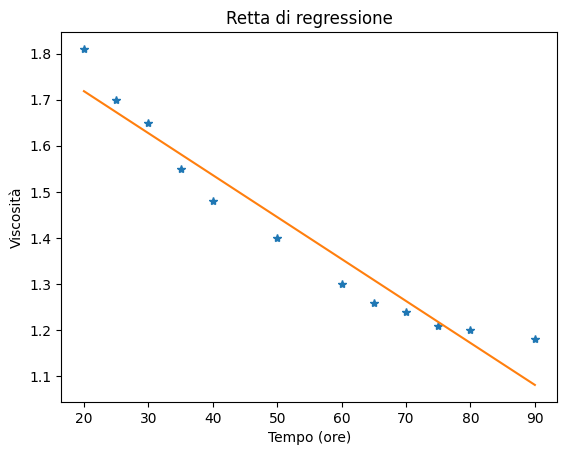

In [24]:
# Quesito 2

import matplotlib.pyplot as plt

assex = np.linspace(20, 90, 1000)
assey = b0 + b1 * assex

plt.plot(x, y, "*")
plt.plot(assex, assey)
plt.title("Retta di regressione")
plt.xlabel("Tempo (ore)")
plt.ylabel("Viscosità")
plt.show()

# Esercizio 3

Il tempo di vita in ore di una batteria segue approssimativamente una distribuzione normale con deviazione standard σ = 1.25. Viene estratto un campione casuale di 10 batterie e si testa per ciascuna di esse il tempo di vita ottenendo i seguenti valori:

39.5, 41.5, 38.5, 42.5, 37.5, 43.5, 36.5, 44.5, 35.5, 45.5.

1. Si calcoli la media campionaria e l’intervallo di confidenza per la media con livello di fiducia 0.05.
2. Vi è evidenza nel supportare l’ipotesi che il tempo di vita ecceda le 40 ore? Si usi α = 0.05.
3. Calcolare il p-value del test precedente.
4. Se il tempo di vita reale fosse di 42 ore quale sarebbe l’errore di secondo tipo del test precedente?


In [25]:
import numpy as np
from scipy.stats import norm

X = np.array([39.5, 41.5, 38.5, 42.5, 37.5, 43.5, 36.5, 44.5, 35.5, 45.5])
dev_std = 1.25
n = X.size

# Quesito 1

media = np.mean(X)
alpha = 0.05
PHI = norm.ppf(1 - alpha / 2)

int_left = media - (dev_std / np.sqrt(n)) * PHI
int_right = media + (dev_std / np.sqrt(n)) * PHI

print("Media campionaria:", media)
print("Intervallo di confidenza per la media [{}, {}]".format(int_left, int_right))

# Quesito 2

mu_0 = 40
Z0 = ((media - mu_0) / dev_std) * np.sqrt(n)
PHI = norm.ppf(1 - alpha / 2)

print("Z0: ", Z0)
print("PHI: ", PHI)
print("Z0 < PHI: NON è possibile rigettare l'ipotesi nulla")

# Quesito 3

p_value = 2 * (1 - norm.cdf(abs(Z0)))
print("p-value:", p_value)

Media campionaria: 40.5
Intervallo di confidenza per la media [39.725256209619296, 41.274743790380704]
Z0:  1.264911064067352
PHI:  1.959963984540054
Z0 < PHI: NON è possibile rigettare l'ipotesi nulla
p-value: 0.2059032107320682
